<a href="https://colab.research.google.com/github/Aashishc-prog/NETFLIX_Recommender_system/blob/main/Capstone_Netflix_Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##**Importing Libraries**

In [64]:
#Importing Librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MultiLabelBinarizer
import scipy

# figure size in inches
rcParams['figure.figsize'] = 25,8

import warnings
warnings.filterwarnings('ignore')

from scipy.stats  import norm


from sklearn.preprocessing import OneHotEncoder
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from tqdm import tqdm

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [67]:
df.shape

(7787, 12)

In [68]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Exploratory Data Analysis**

##Checking for null values

In [69]:
print(f'shape is {df.shape}')
print(f'columns:{list(df.columns)}')

shape is (7787, 12)
columns:['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [70]:
df.isnull().sum()[df.isnull().sum() !=0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

##Checking if TV Shows have repititions as different seasons

In [73]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [74]:
len(df[df['type']=='TV Show']['title'].unique()) #therefore all titles are unique no season 1 and season 2 type of data exists

2410

##Getting top 10 directors (by number of movies directed), their country and the type of work

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

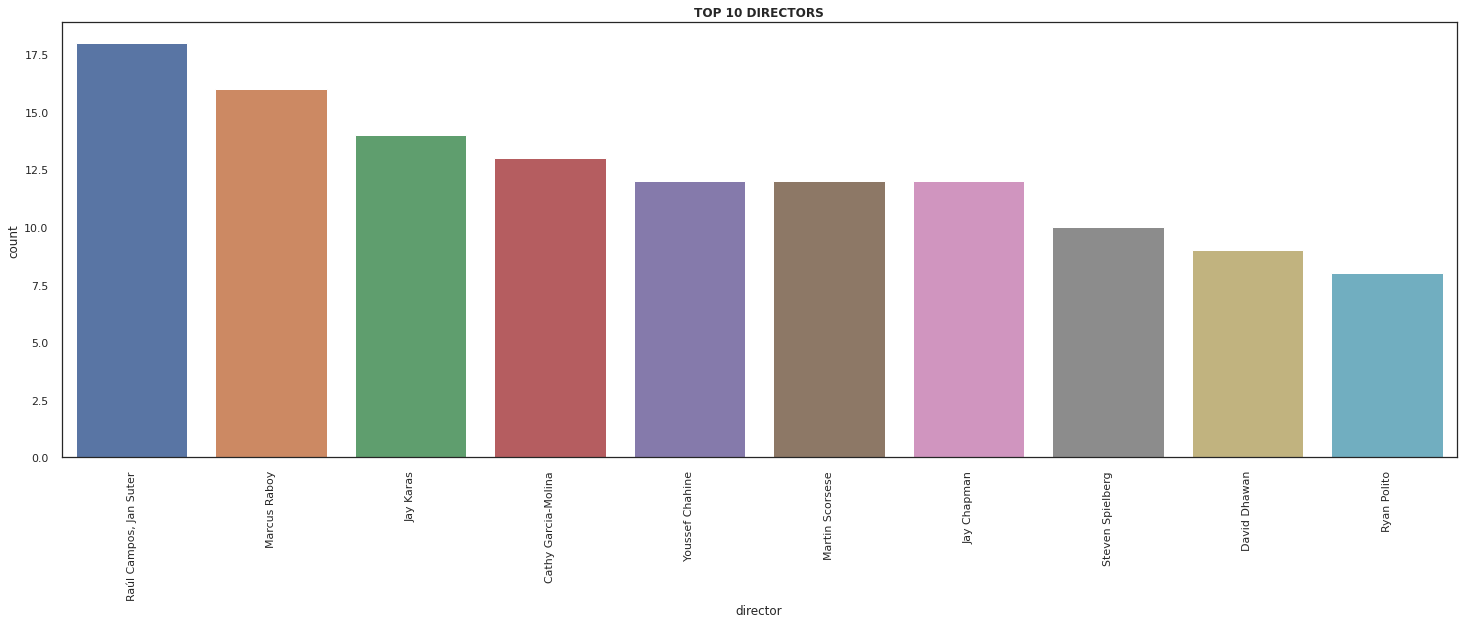

In [75]:
sns.set_theme(style='white')
sns.countplot(x='director', data = df , order = pd.DataFrame(df['director'].value_counts()).head(10).index)
plt.title('TOP 10 DIRECTORS',weight='bold')
plt.xticks(rotation = 90)

In [76]:
top_dir = pd.DataFrame(df['director'].value_counts()).index
dir_country = []
dir_genre = []
dir_type = []
for i in range(10):
  dir_country.append(list(df[df['director']==top_dir[i]]['country'].unique()))
  dir_genre.append(list(df[df['director']==top_dir[i]]['listed_in'].unique()))
  dir_type.append(list(df[df['director']==top_dir[i]]['type'].unique()))
dir_country_dict=dict(zip(list(top_dir[0:10]),dir_country))
dir_genre_dict=dict(zip(list(top_dir[0:10]),dir_genre))
dir_type_dict=dict(zip(list(top_dir[0:10]),dir_type))

In [77]:
dir_country_dict

{'Raúl Campos, Jan Suter': ['Mexico', 'Colombia', 'Argentina', 'Chile'],
 'Marcus Raboy': ['United States', nan],
 'Jay Karas': ['United States'],
 'Cathy Garcia-Molina': ['Philippines'],
 'Youssef Chahine': ['Egypt, Algeria',
  'France, Egypt',
  'Egypt',
  'Egypt, France'],
 'Martin Scorsese': ['United States',
  'United States, Italy',
  'United Kingdom, United States, France',
  'United Kingdom, United States, Japan',
  'United States, Hong Kong'],
 'Jay Chapman': ['United States'],
 'Steven Spielberg': ['United States, Canada',
  'United States',
  'United States, India',
  'United States, New Zealand, United Kingdom'],
 'David Dhawan': ['India'],
 'Ryan Polito': ['United States']}

In [78]:
dir_genre_dict

{'Raúl Campos, Jan Suter': ['Stand-Up Comedy'],
 'Marcus Raboy': ['Stand-Up Comedy',
  'Stand-Up Comedy & Talk Shows, TV Comedies'],
 'Jay Karas': ['Stand-Up Comedy',
  'Children & Family Movies, Comedies, Sports Movies'],
 'Cathy Garcia-Molina': ['Dramas, International Movies, Romantic Movies',
  'International Movies, Romantic Movies',
  'Comedies, Dramas, International Movies',
  'Comedies, International Movies, Romantic Movies'],
 'Youssef Chahine': ['Classic Movies, Dramas, International Movies',
  'Dramas, International Movies',
  'Action & Adventure, Classic Movies, Dramas',
  'Dramas, International Movies, Romantic Movies'],
 'Martin Scorsese': ['Classic Movies, Comedies, Dramas',
  'Dramas',
  'Classic Movies, Dramas',
  'Children & Family Movies, Dramas',
  'Classic Movies, Dramas, Independent Movies',
  'Documentaries, Music & Musicals',
  'Classic Movies, Dramas, Sports Movies',
  'Classic Movies, Dramas, Thrillers',
  'Dramas, Thrillers'],
 'Jay Chapman': ['Stand-Up Comedy

In [79]:
dir_type_dict

{'Raúl Campos, Jan Suter': ['Movie'],
 'Marcus Raboy': ['Movie', 'TV Show'],
 'Jay Karas': ['Movie'],
 'Cathy Garcia-Molina': ['Movie'],
 'Youssef Chahine': ['Movie'],
 'Martin Scorsese': ['Movie'],
 'Jay Chapman': ['Movie'],
 'Steven Spielberg': ['Movie'],
 'David Dhawan': ['Movie'],
 'Ryan Polito': ['Movie', 'TV Show']}

##Top 10 actors (by number of movies appeared in)

In [80]:
work_df = pd.DataFrame(df['cast']).dropna().reset_index(drop=True)

In [81]:
actors = np.array([])
for i in range(work_df.shape[0]):
  actors_list = work_df['cast'][i].split(',')
  actors = np.append(actors,actors_list)

In [82]:
actors_df = pd.DataFrame(actors,columns=['actors'])

In [83]:
actors_df

,actors
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
55950,Anita Shabdish
55951,Chittaranjan Tripathy
55952,Nasty C
55953,Adriano Zumbo


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

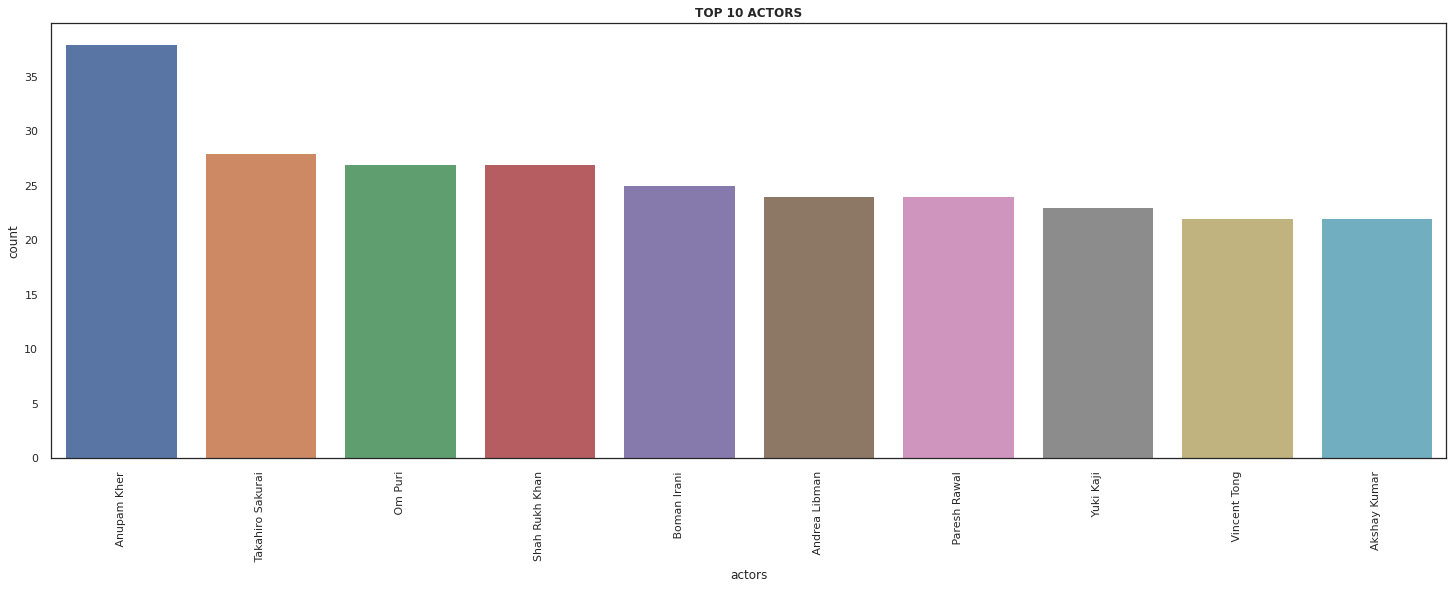

In [84]:
sns.set_theme(style='white')
sns.countplot(x='actors', data = actors_df , order = actors_df['actors'].value_counts().head(10).index)
plt.title('TOP 10 ACTORS',weight='bold')
plt.xticks(rotation = 90)

##Top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

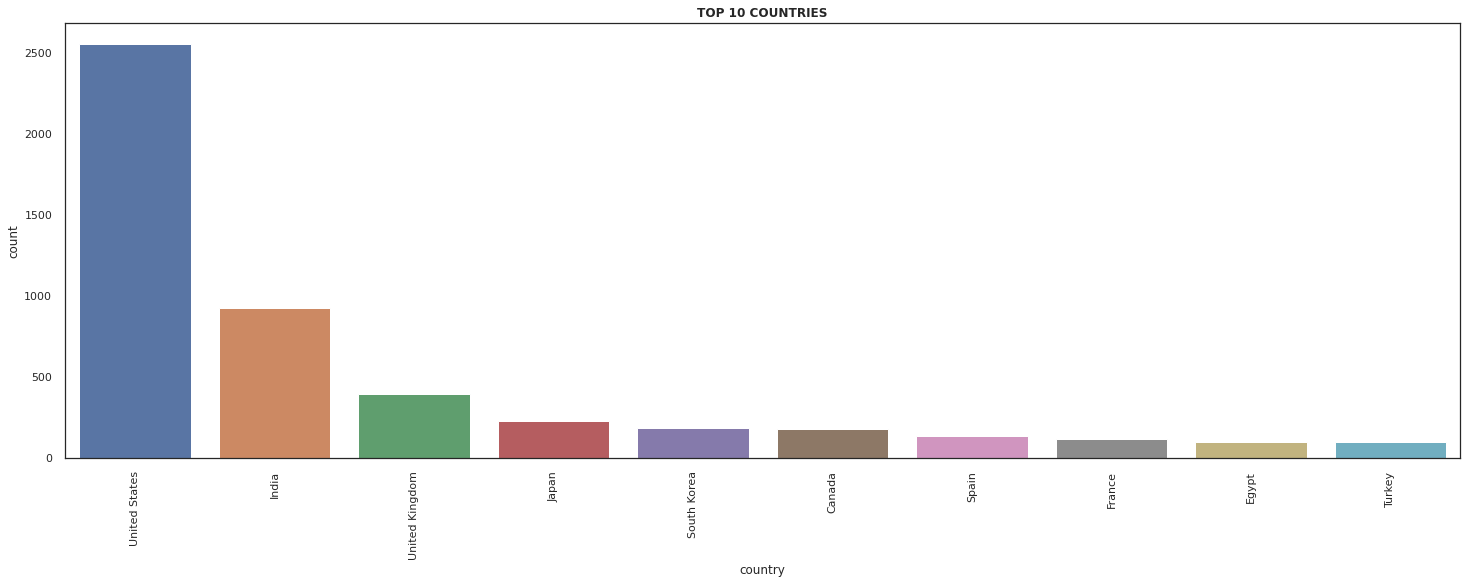

In [85]:
sns.set_theme(style='white')
sns.countplot(x='country', data = df , order = pd.DataFrame(df['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES',weight='bold')
plt.xticks(rotation = 90)

In [86]:
moviesdf = df[df['type']=='Movie']

In [87]:
tvdf = df[df['type']=='TV Show']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

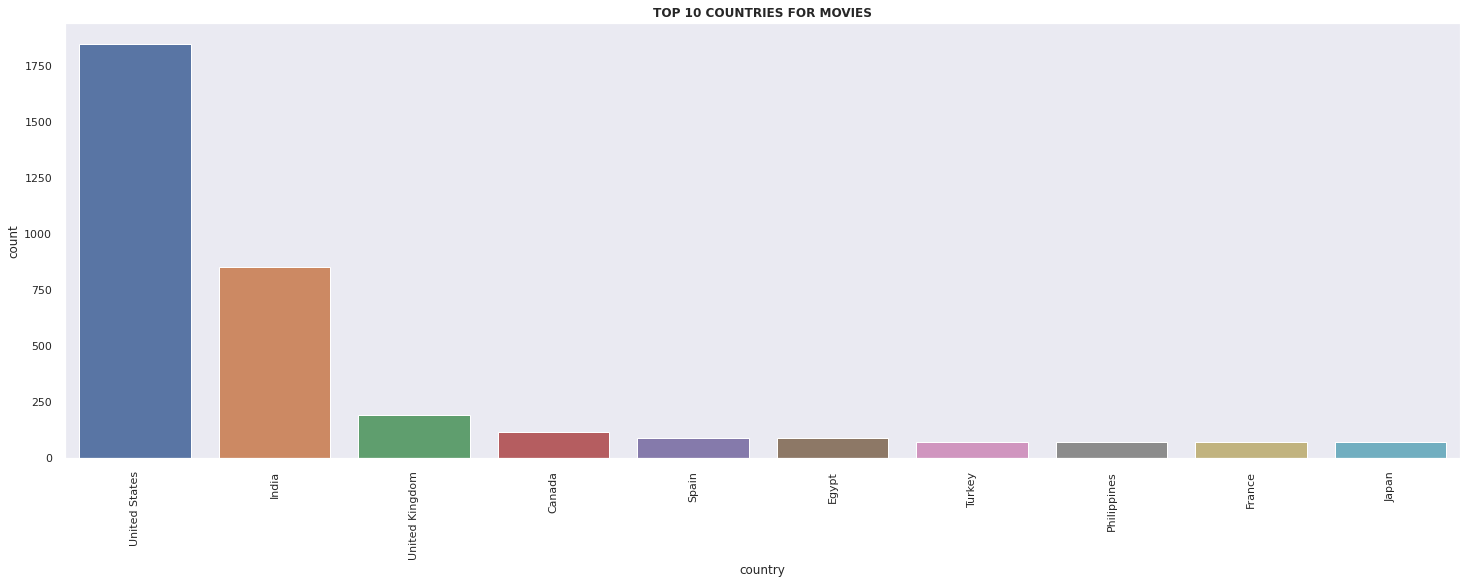

In [88]:
sns.set_theme(style='dark')
sns.countplot(x='country', data = moviesdf , order = pd.DataFrame(moviesdf['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES FOR MOVIES',weight='bold')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

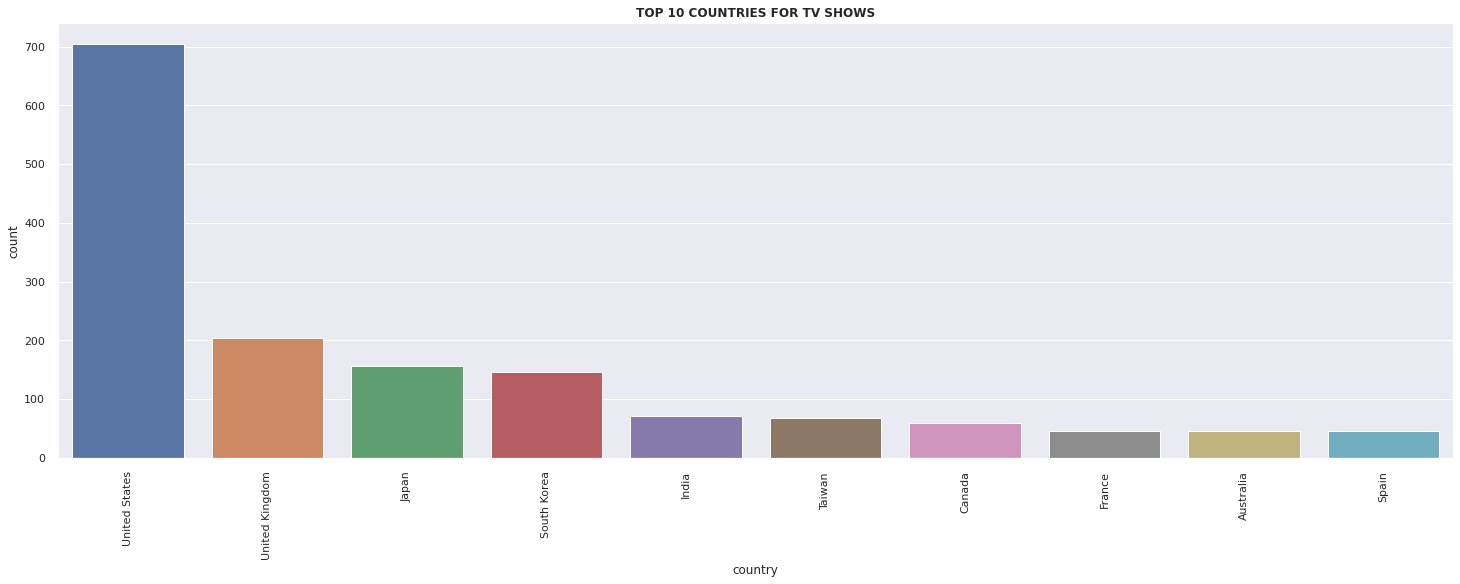

In [89]:
sns.set_theme(style='darkgrid')
sns.countplot(x='country', data = tvdf , order = pd.DataFrame(tvdf['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES FOR TV SHOWS',weight='bold')
plt.xticks(rotation = 90)

##When movies are added to the netflix

In [90]:
df2 = pd.DataFrame(df['date_added']).dropna().reset_index(drop=True)

In [91]:
df2.head()

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"


In [92]:
df2['month_added'] = df['date_added'].apply(lambda x: str(x).split()[0])

In [93]:
df2=df2.dropna()

In [94]:
df2.head()

,date_added,month_added
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


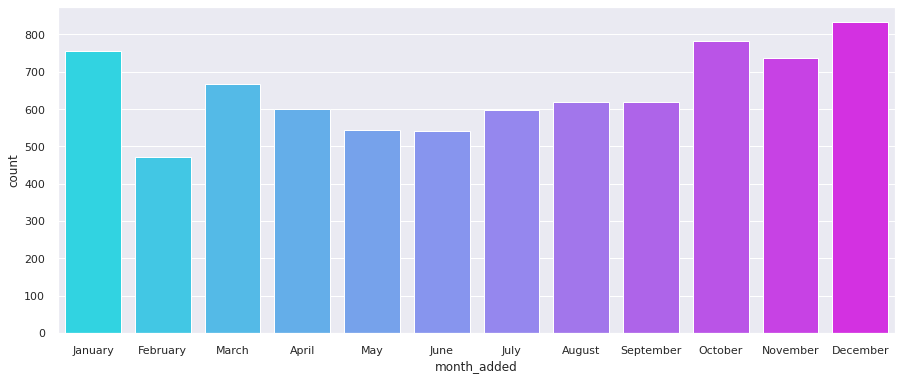

In [95]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df2,order=new_order,palette='cool')

##How ratings changed over the years ?

In [96]:
wdf = pd.DataFrame(df['release_year'].value_counts()).sort_index().rename(columns={'release_year':'movie_counts'}).reset_index()

<BarContainer object of 73 artists>

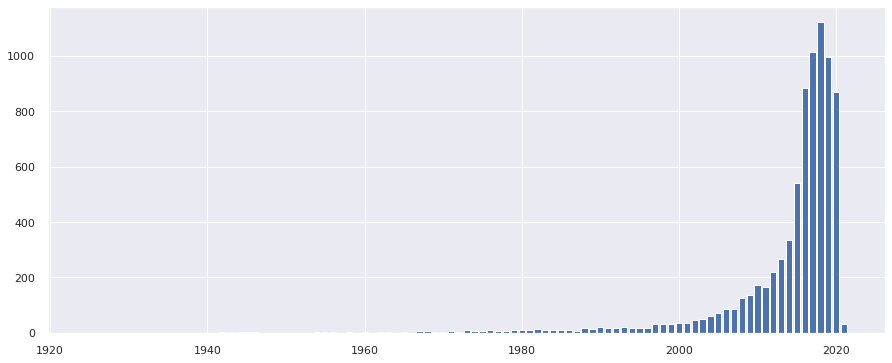

In [97]:
plt.bar(wdf['index'],wdf['movie_counts'])

Since, number of movies is extremely less for the early years we work only with movies released after 2000

<BarContainer object of 22 artists>

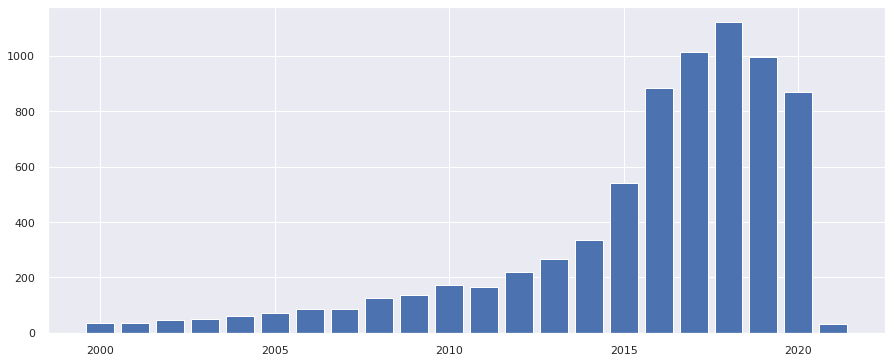

In [98]:
wdf = wdf[wdf['index']>=2000]
plt.bar(wdf['index'],wdf['movie_counts'])

In [99]:
movie_df = df[df['type']=='Movie']
movie_df = movie_df[movie_df['release_year']>=2000]
mdf = movie_df[['rating','release_year']].dropna().reset_index(drop=True)
mdf = mdf[mdf['rating'].isin(['R','PG-13','PG','G','NR','UR'])]
rdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})

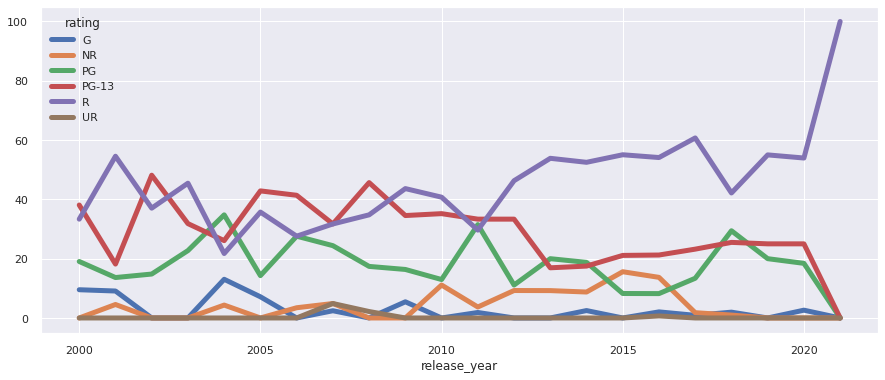

In [100]:
rdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0)

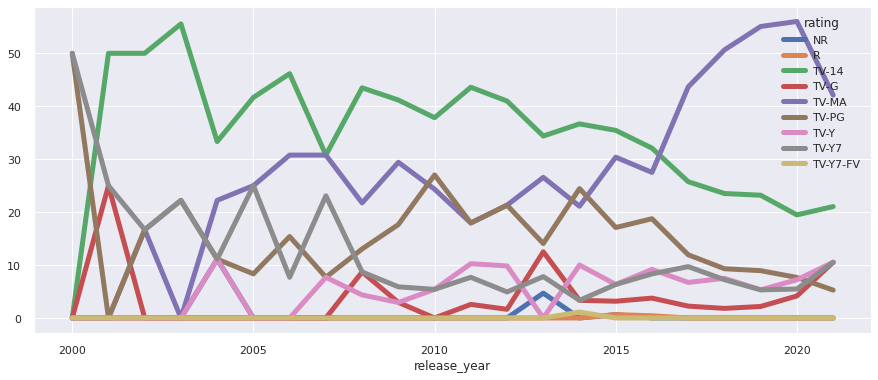

In [101]:
show_df = df[df['type']=='TV Show']
show_df = show_df[show_df['release_year']>=2000]
mdf = show_df[['rating','release_year']].dropna().reset_index(drop=True)
sdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})
sdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0,grid=True)

#**Type of contents availabe in different countries**

In [102]:
df1 = df[['country','rating','listed_in','type']].dropna().reset_index(drop=True)

In [103]:
tdf = df1[~df1['country'].str.contains(',')]

In [104]:
tdf.isnull().sum()

country      0
rating       0
listed_in    0
type         0
dtype: int64

##Content available by rating

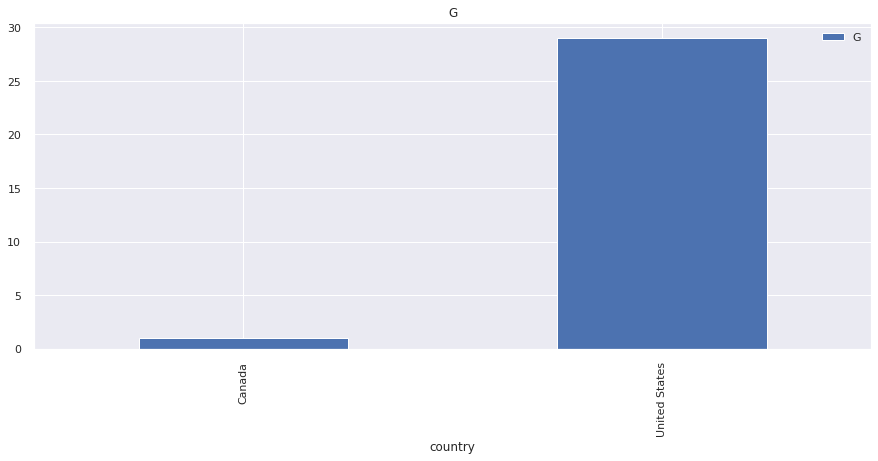

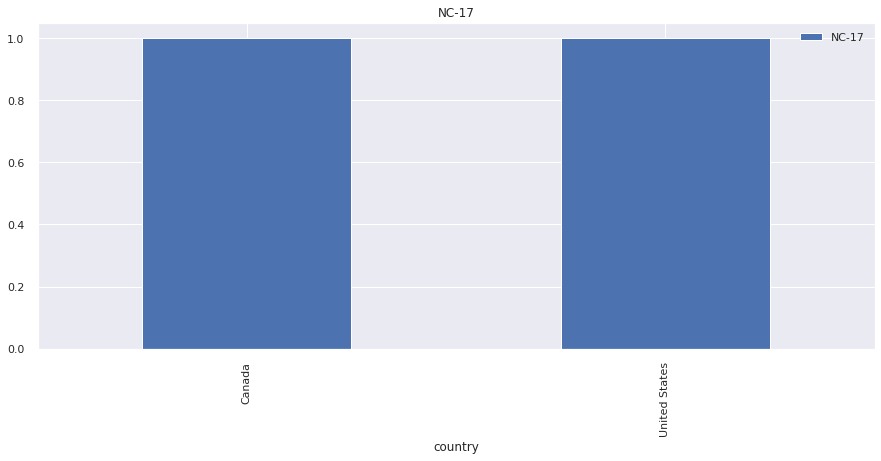

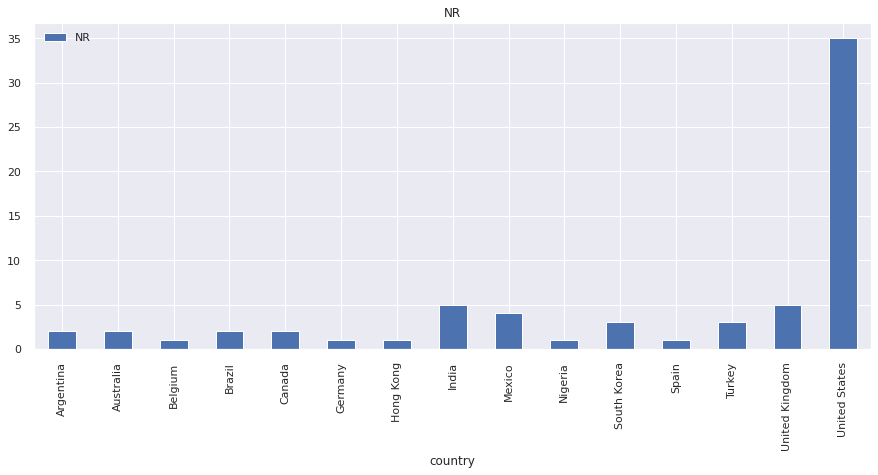

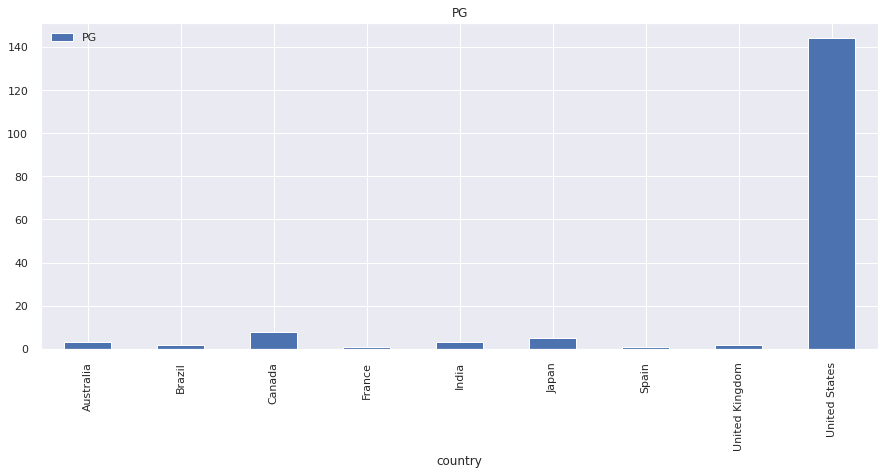

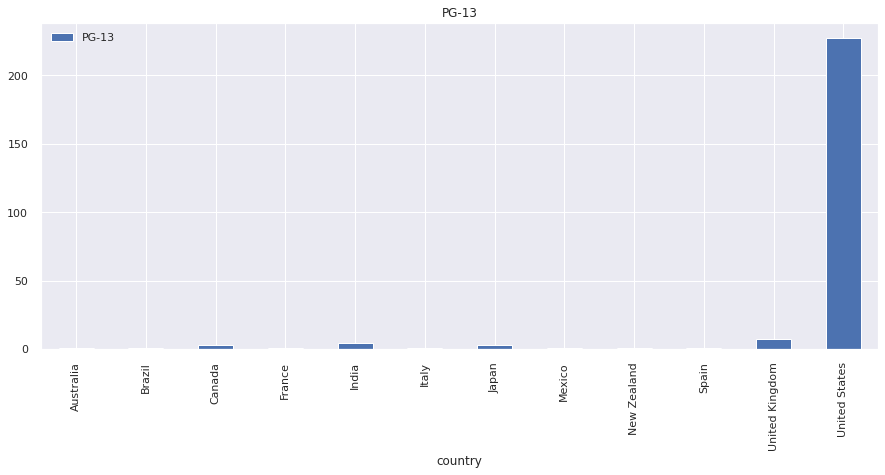

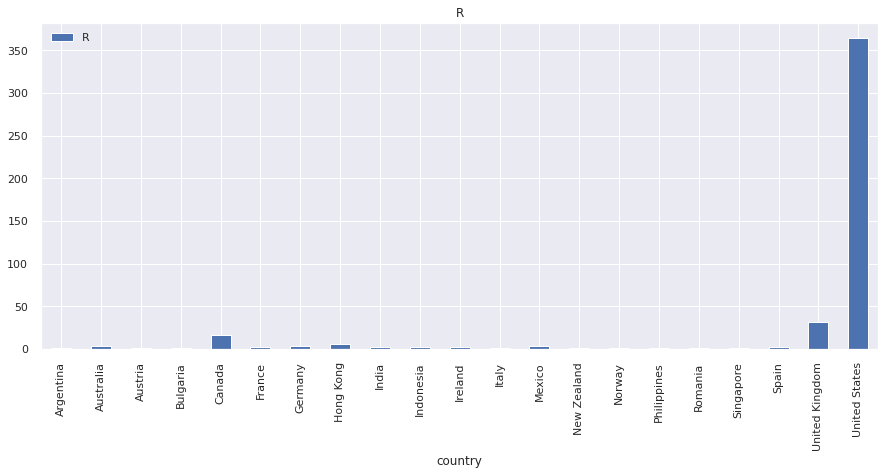

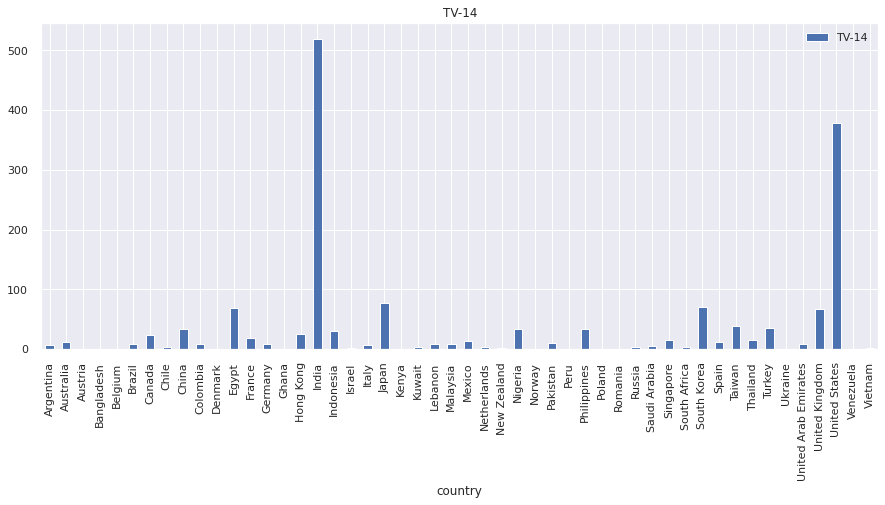

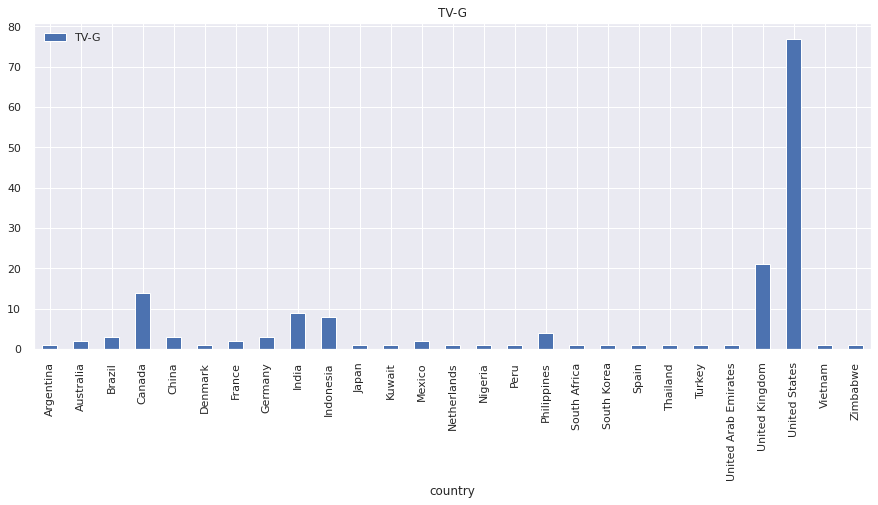

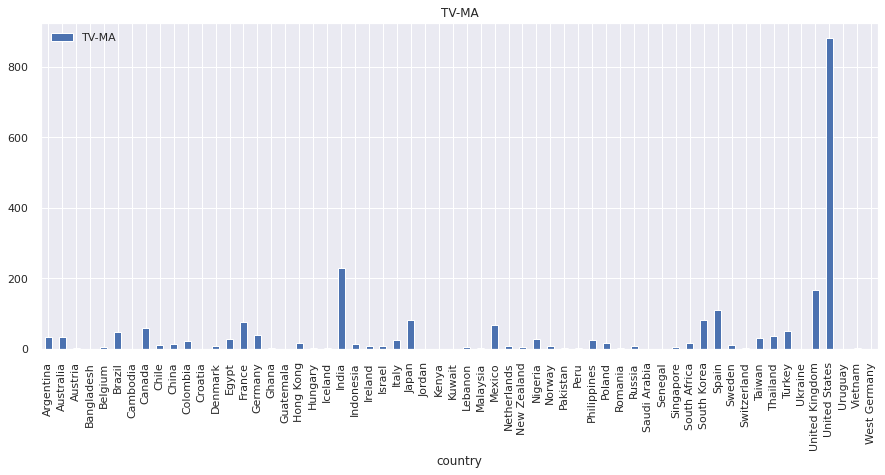

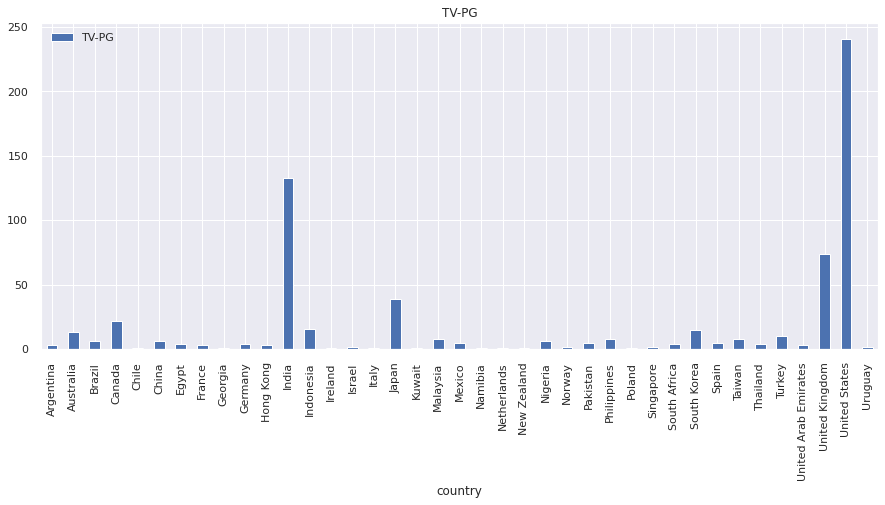

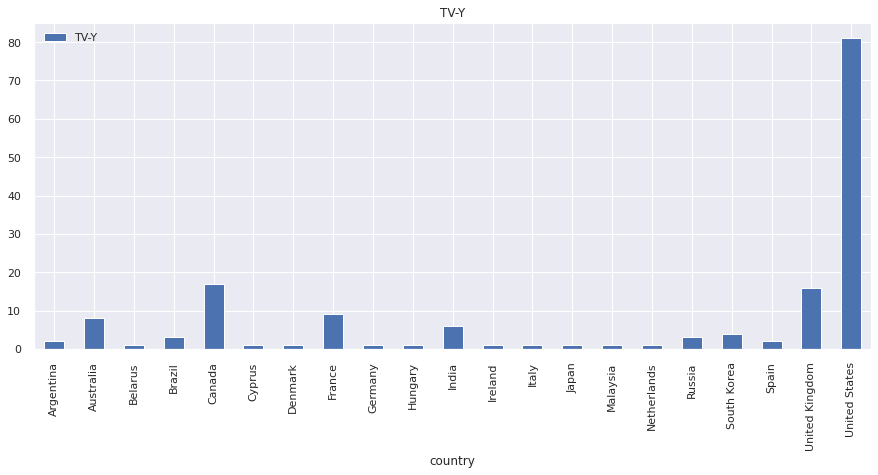

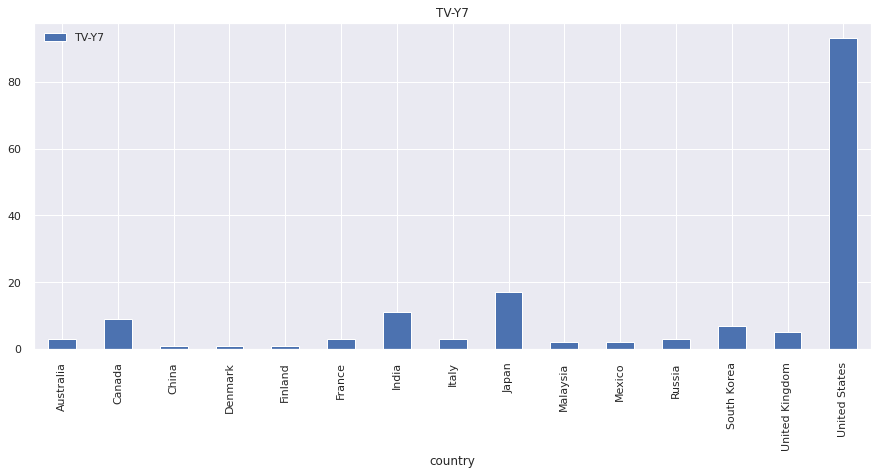

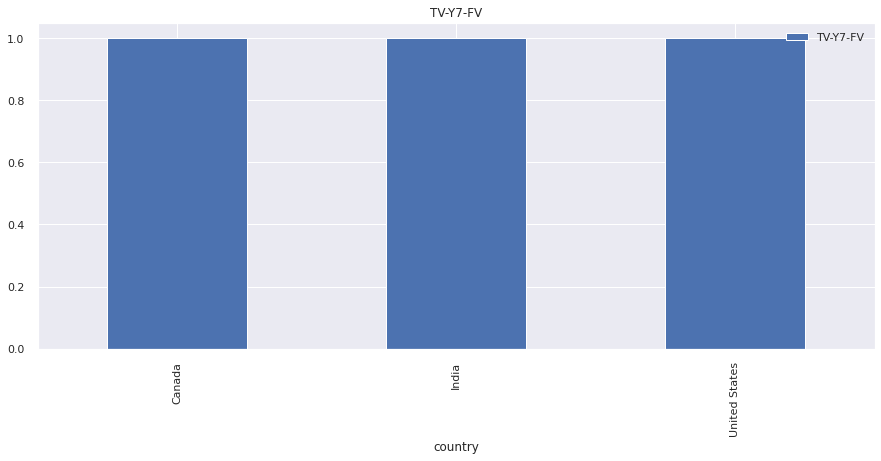

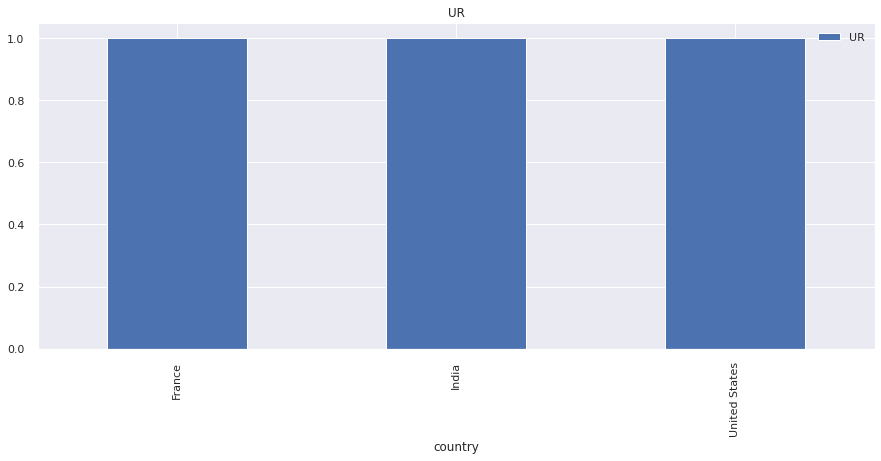

In [105]:
c_df = tdf.groupby(['country','rating'])['rating'].count().unstack().fillna(0)
for i,rating, in list(enumerate(c_df.columns.to_list())):
  pd.DataFrame(c_df[c_df[rating] != 0][rating]).plot(kind='bar',title=rating)
  plt.show()

##Content available by type in every country

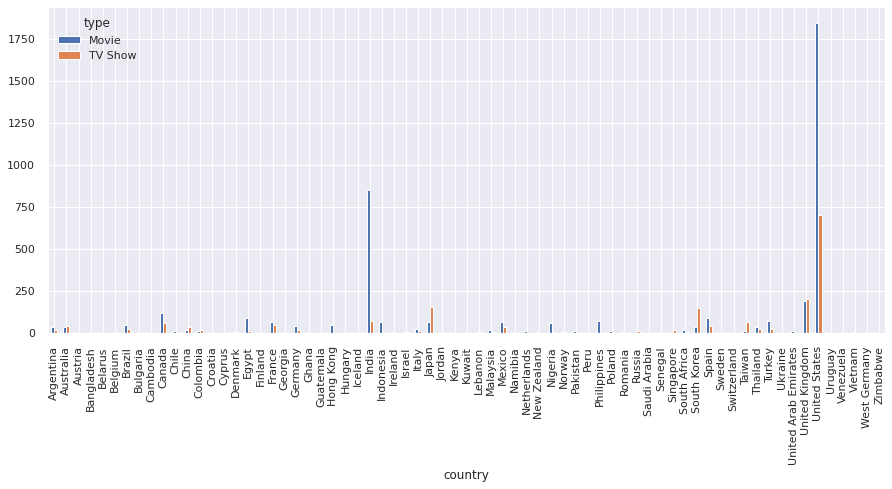

In [106]:
mdf = tdf.groupby(['country','type'])['type'].count().unstack().fillna(0)
mdf.plot(kind='bar',grid=True)

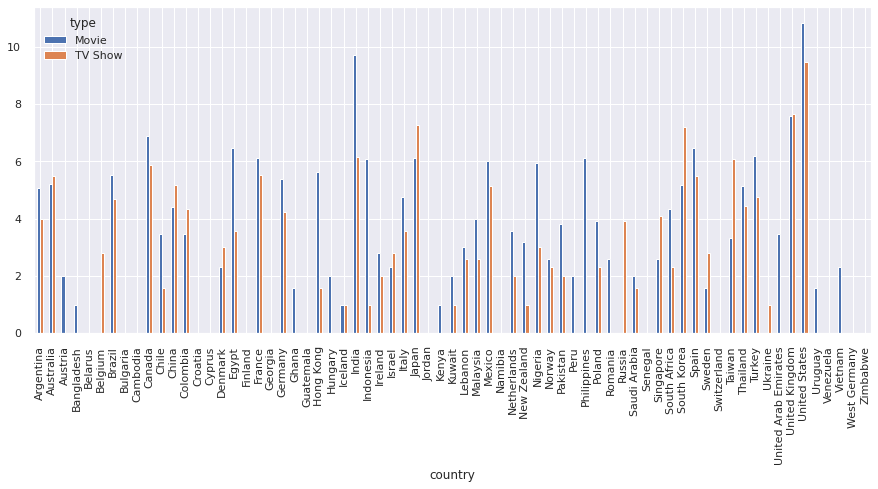

In [107]:
(np.log2(mdf)).replace(-np.inf, 0).plot(kind='bar',grid=True)

##Content available by genre

In [108]:
tdf

,country,rating,listed_in,type
0,Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",TV Show
1,Mexico,TV-MA,"Dramas, International Movies",Movie
2,Singapore,R,"Horror Movies, International Movies",Movie
3,United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",Movie
4,United States,PG-13,Dramas,Movie
...,...,...,...,...
7267,Mexico,TV-MA,"International TV Shows, Spanish-Language TV Sh...",TV Show
7268,India,TV-MA,"Dramas, Independent Movies, International Movies",Movie
7269,United States,PG,"Children & Family Movies, Comedies",Movie
7271,India,TV-14,"Dramas, International Movies, Music & Musicals",Movie


In [109]:
tdf=pd.DataFrame(tdf[['country','listed_in']])
tdf['genre'] = tdf['listed_in'].apply(lambda x: x.split(','))
tdf.drop('listed_in',axis=1,inplace=True)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)
X = mlb.fit_transform(tdf['genre'])
df1 = tdf.join(pd.DataFrame.sparse.from_spmatrix(X,
                index=tdf.drop(columns='genre').index,
                columns=mlb.classes_))

In [110]:
df1.drop(columns='genre',inplace=True)

In [111]:
df1.reset_index(drop=True,inplace=True)

In [112]:
df1.head()

,country,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mexico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United States,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,United States,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
genres = df1.columns.to_list()[1:]

In [114]:
genre_sum_dict = {}
for genre in genres:
  genre_sum_dict[genre]=df1[genre].sum()

In [115]:
genres=genre_sum_dict.keys()
genre_count=genre_sum_dict.values()
df1 = pd.DataFrame(list(zip(genres, genre_count)),
               columns =['genre', 'count'])

In [116]:
df1.set_index('genre',inplace=True)

<BarContainer object of 73 artists>

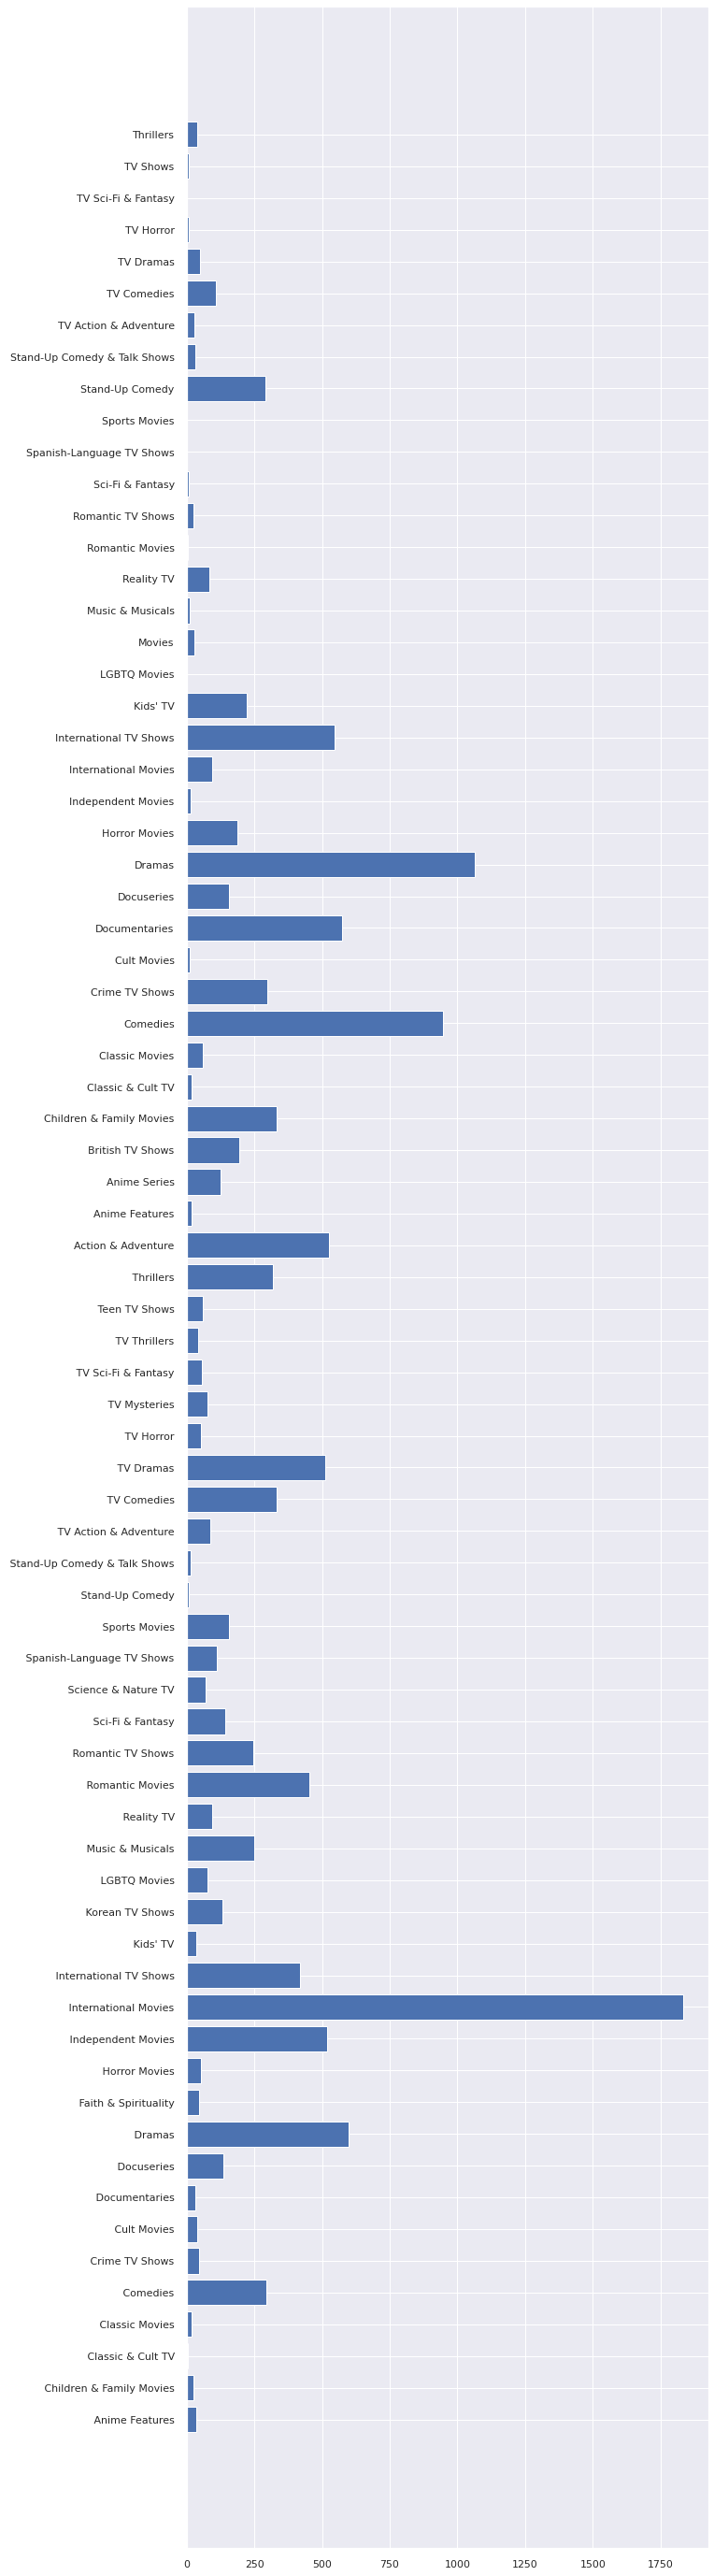

In [117]:
plt.figure(figsize=(10, 50))
plt.barh(list(genres), list(genre_count))

#**Has Netflix been increasingly focusing on TV rather than movies in recent years.**

**$H_{0}$= Netflix is not focusing more on TV Series than movies i.e., p=0.5 (where p is the proportion of movies released in recent years)**



**$H_{A}$ = Netflix is focusing less on movies i.e., $p<0.5$ we will be conducting left tailed test..**

In [118]:
df['year_added'] = df['date_added'].apply(lambda x: str(x)[-4:])

In [119]:
hdf = df.groupby(['year_added','type'])['show_id'].count().unstack().fillna(0).reset_index()

In [120]:
hdf = hdf.loc[:13]

In [121]:
hdf = hdf.astype({'year_added':int})

In [122]:
hdf2 = hdf[hdf['year_added']>=2010]

In [123]:
hdf2['movie_%'] = hdf2['Movie']*100 / (hdf2['Movie'] + hdf2['TV Show'])

In [124]:
hdf2

type,year_added,Movie,TV Show,movie_%
2,2010,1.0,0.0,100.000000
3,2011,13.0,0.0,100.000000
4,2012,3.0,0.0,100.000000
5,2013,6.0,5.0,54.545455
6,2014,19.0,6.0,76.000000
7,2015,58.0,30.0,65.909091
8,2016,258.0,185.0,58.239278
9,2017,864.0,361.0,70.530612
10,2018,1255.0,430.0,74.480712
11,2019,1497.0,656.0,69.530887


In [125]:
hdf2.describe()

type,year_added,Movie,TV Show,movie_%
count,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,447.833333,199.916667,75.812986
std,3.605551,599.656392,267.614532,15.937938
min,2010.000000,1.000000,0.000000,54.545455
25%,2012.750000,11.250000,3.750000,65.758349
50%,2015.500000,73.000000,29.500000,72.505662
75%,2018.250000,961.750000,378.250000,82.000000
max,2021.000000,1497.000000,697.000000,100.000000


In [126]:
z=(0.75-0.5)/(np.sqrt(0.5*0.5/12))

In [127]:
z

1.7320508075688774

In [128]:
norm.cdf(1.73)

0.9581848623864051

Therefore, we cannot reject the null hypothesis. This can further be seen in the plots

In [129]:
df3 = df[['date_added','type']]

In [130]:
df3['year_added'] = df['date_added'].apply(lambda x: str(x)[-4:])

In [131]:
df3 = df3.dropna()

In [132]:
df3 = df3.astype({'year_added':int})

In [133]:
df3 = df3.sort_values(by=['year_added'], ascending=True)

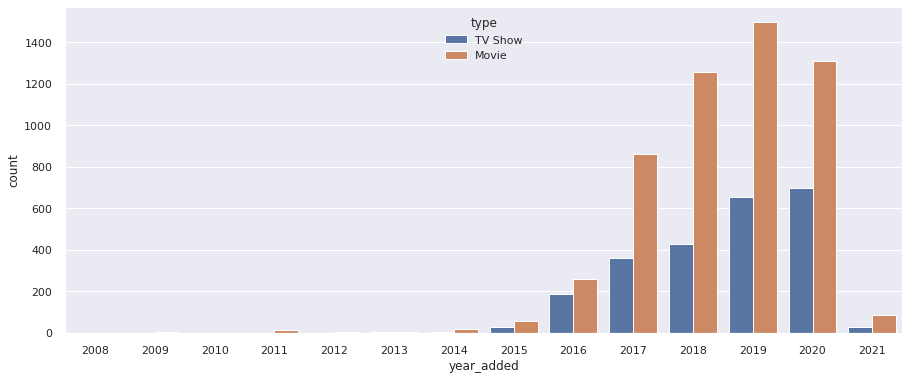

In [134]:
sns.countplot(x='year_added',data=df3,hue=df3['type'])

*Moreover* we have many reasons to believe that netflix adds more movies in their platfom than TV-Shows. Just the shear duration and production time supports this heavily.

#**Clustering and Recommender systems**

## k-nn on genre and type

In [135]:
df.head() #Since we don't have a rich dataset we try not to use any columns with high null values


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [136]:
df3 = df[['show_id','title','type','rating','listed_in']].dropna().reset_index(drop=True)

In [137]:
df3['genre'] = df['listed_in'].apply(lambda x: str(x).split(','))

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
X=encoder.fit_transform(df3[['type','rating']])

In [140]:
X.toarray().shape

(7780, 16)

In [141]:
encoder.get_feature_names_out()

array(['type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR'],
      dtype=object)

In [142]:
df3_encoded = pd.DataFrame(X.toarray(),columns=encoder.get_feature_names_out()).astype(int)

In [143]:
df4 = pd.concat([df3,df3_encoded],axis=1).drop(columns=['type','rating','listed_in'])

In [144]:
mlb = MultiLabelBinarizer(sparse_output=True)
df5=df4.join(pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df4.pop('genre')),
                index=df4.index,
                columns=mlb.classes_))

In [145]:
df5 = df5.drop(columns=['show_id']).reset_index().rename(columns={'index':'id'})

In [146]:
genres_list = list(df5.columns)[2:]
genres_list

['type_Movie',
 'type_TV Show',
 'rating_G',
 'rating_NC-17',
 'rating_NR',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'rating_TV-14',
 'rating_TV-G',
 'rating_TV-MA',
 'rating_TV-PG',
 'rating_TV-Y',
 'rating_TV-Y7',
 'rating_TV-Y7-FV',
 'rating_UR',
 ' Anime Features',
 ' Children & Family Movies',
 ' Classic & Cult TV',
 ' Classic Movies',
 ' Comedies',
 ' Crime TV Shows',
 ' Cult Movies',
 ' Documentaries',
 ' Docuseries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' International TV Shows',
 " Kids' TV",
 ' Korean TV Shows',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Reality TV',
 ' Romantic Movies',
 ' Romantic TV Shows',
 ' Sci-Fi & Fantasy',
 ' Science & Nature TV',
 ' Spanish-Language TV Shows',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Stand-Up Comedy & Talk Shows',
 ' TV Action & Adventure',
 ' TV Comedies',
 ' TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 ' TV Sci-Fi & Fantasy',
 ' TV Thrillers',
 ' Teen TV

In [147]:
#calculating distance between two movies in space
from scipy import spatial
def dist(id1,id2):
  XA=df5[df5['id']==id1][genres_list].values #from actual_set
  XB=df5[df5['id']==id2][genres_list].values #scanning through train set part
  return spatial.distance.cosine(XA,XB),id1,id2

In [148]:
def get_recommended(id1,n):
  '''Enter movie id name on which you want to get recommended and the number of recommendations you want'''
  input_movie_name = df5["title"][id1]
  print(f'selected show/movie is {input_movie_name}')
  input_array = df5[df5['id']==id1][genres_list].to_numpy()
  movie_dists=[]
  for i in list(df5['id']):
    movie_dists.append(dist(id1,i))
  X = sorted(movie_dists, 
       key=lambda x: x[0])
  recom_id = []
  for i in X:
    recom_id.append(i[2])
  Z=[x for x in recom_id if x not in [id1]]
  recom_cont = []
  for k in Z:
    recom_cont.append(df5[df5["id"]==k]["title"].to_list())
  print('Recommended Movies are:')
  return recom_cont[:n]

In [149]:
get_recommended(1783,9)

selected show/movie is Diva Brides
Recommended Movies are:


[['Diablero'],
 ['Episodes'],
 ['La Niña'],
 ['Bright: The Music Videos'],
 ['Burned Cocoon'],
 ['Charité'],
 ["Dragon's Dogma"],
 ['Imposters'],
 ['Murderous Affairs']]

In [150]:
get_recommended(5766,10)

selected show/movie is Spy Kids
Recommended Movies are:


[['A Wrinkle in Time'],
 ['Aliens Ate My Homework'],
 ['Dolphin Tale 2'],
 ['Hop'],
 ['Howards End'],
 ['Monster House'],
 ['Spy Kids 2: The Island of Lost Dreams'],
 ['The Prince & Me'],
 ['A Cinderella Story: Christmas Wish'],
 ['Bee Movie']]

In [151]:
get_recommended(3233,10)

selected show/movie is Judy Moody and the Not Bummer Summer
Recommended Movies are:


[['If Anything Happens I Love You'],
 ['Jack and the Cuckoo-Clock Heart'],
 ['Muppets Most Wanted'],
 ['The Willoughbys'],
 ['Arthur Christmas'],
 ['Becoming'],
 ['Boy and the World'],
 ["Okko's Inn"],
 ['The Flintstones in Viva Rock Vegas'],
 ['The Lake House']]

In [152]:
get_recommended(1808,15)

selected show/movie is Don Quixote: The Ingenious Gentleman of La Mancha
Recommended Movies are:


[['Radium Girls'],
 ['Raees'],
 ['Thank You'],
 ['Baaghi'],
 ['Bangistan'],
 ['Blood Money'],
 ['Brothers'],
 ['Don 2'],
 ['Doubles Cause Troubles'],
 ['High End Yaariyan'],
 ['Jaane Tu... Ya Jaane Na'],
 ['Jal'],
 ['Joshua: Teenager vs. Superpower'],
 ['Liss Pereira: Reteniendo líquidos'],
 ['Mark Gatiss: A Study in Sherlock']]

In [153]:
get_recommended(6201,15)

selected show/movie is The Charming Stepmom
Recommended Movies are:


[['The Great British Baking Show'],
 ['The Great British Baking Show: Holidays'],
 ['Comedians in Cars Getting Coffee'],
 ['Survivor'],
 ['Tunnel'],
 ['Blown Away'],
 ['Hinterland'],
 ['Legacies'],
 ['LOST SONG'],
 ['ONE PIECE'],
 ['Scandal'],
 ['Shaka Zulu'],
 ['The Truth'],
 ['Toradora!'],
 ['A Perfect Crime']]

##Text pre processing